In [64]:
# Importing all necessary packages at the start of the notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request
from os.path import exists
from sklearn.preprocessing import MinMaxScaler
from helper_functions import *

In [65]:
url = 'https://github.com/MicrosoftDocs/ml-basics/raw/master/challenges/data/flights.csv'
filename = 'dataset/explore/flights.csv'
if not exists(filename):
    urllib.request.urlretrieve(url, filename)
else:
    print(f'{filename} file already present')

dataset/explore/flights.csv file already present


In [66]:
df = pd.read_csv(filename)

In [67]:
df.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15              True
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [68]:
# Since DepDel15 contains null values, we will check if there was any delay at all
df[df['DepDel15'].isna()]['DepDelay'].sum()


0

In [69]:
# since there was no delay in those flights, we will consider 0 for those records
df.loc[df['DepDel15'].isna(),'DepDel15'] = 0.0

In [70]:
df.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15             False
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [71]:
var_data = df['DepDelay']

min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
med_val = var_data.median()
mod_val = var_data.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))



Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



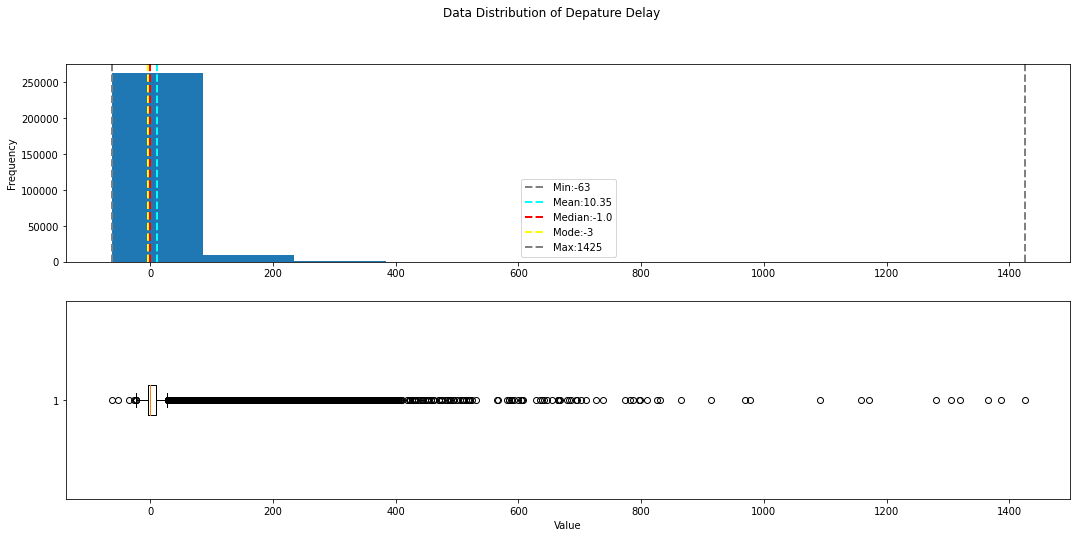

In [72]:
show_distribution(df.DepDelay, 'Depature Delay',figsize=(18,8))

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



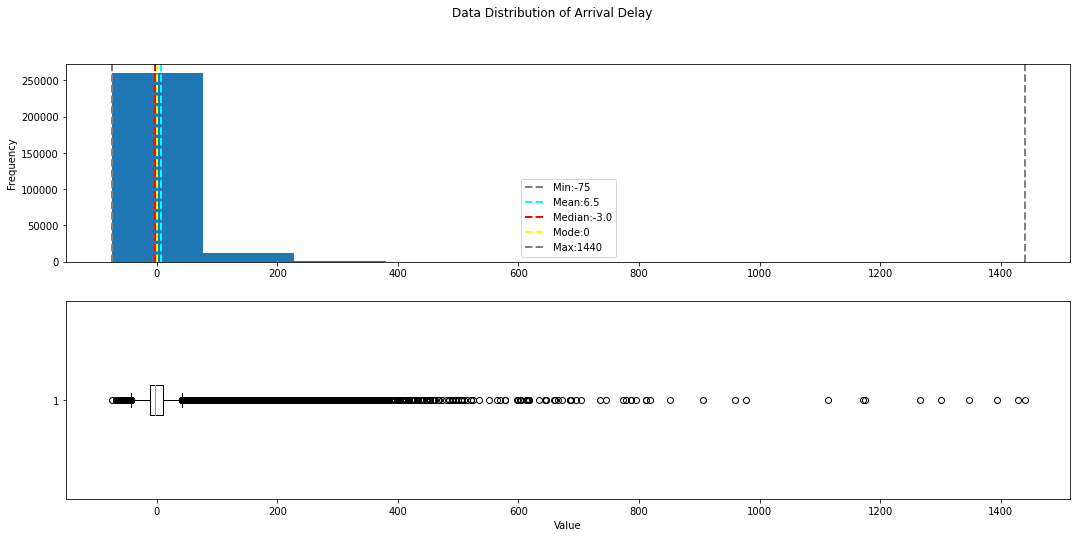

In [73]:
show_distribution(df.ArrDelay, 'Arrival Delay',figsize=(18,8))

In [88]:
# CLearly there are many outliers in DepDelay
dep_q80 = df.DepDelay.quantile(0.95)
dep_q01 = df.DepDelay.quantile(0.01)
arr_q80 = df.ArrDelay.quantile(0.95)
arr_q01 = df.ArrDelay.quantile(0.01)
df_cleaned = df[(df.DepDelay < dep_q80) & (df.DepDelay > dep_q01) & (df.ArrDelay < arr_q80) & (df.ArrDelay > arr_q01)]

Minimum:-11.00
Mean:3.92
Median:-1.00
Mode:-3.00
Maximum:69.00



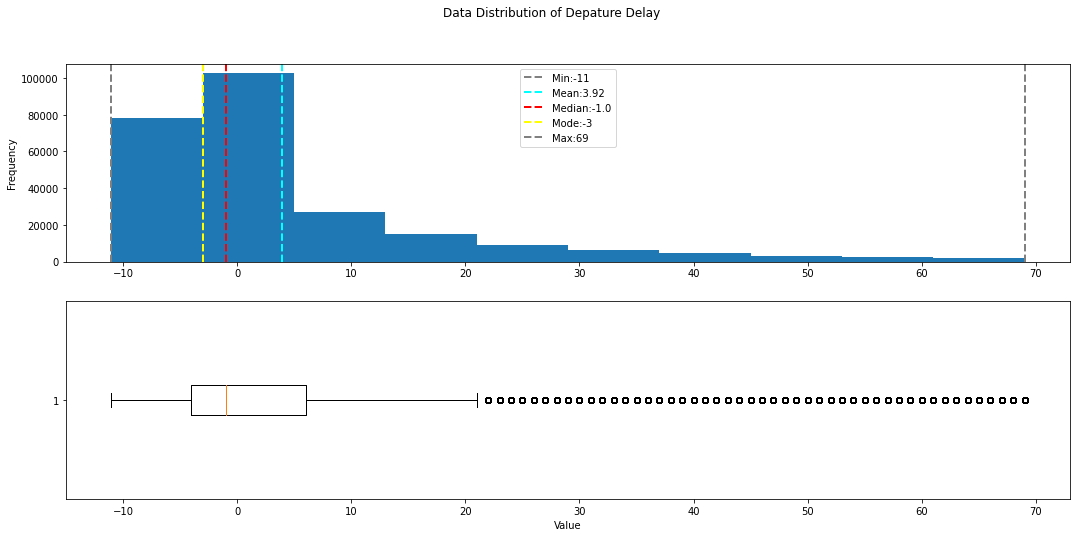

In [89]:
show_distribution(df_cleaned.DepDelay, 'Depature Delay',figsize=(18,8))

Minimum:-32.00
Mean:-0.09
Median:-4.00
Mode:0.00
Maximum:70.00



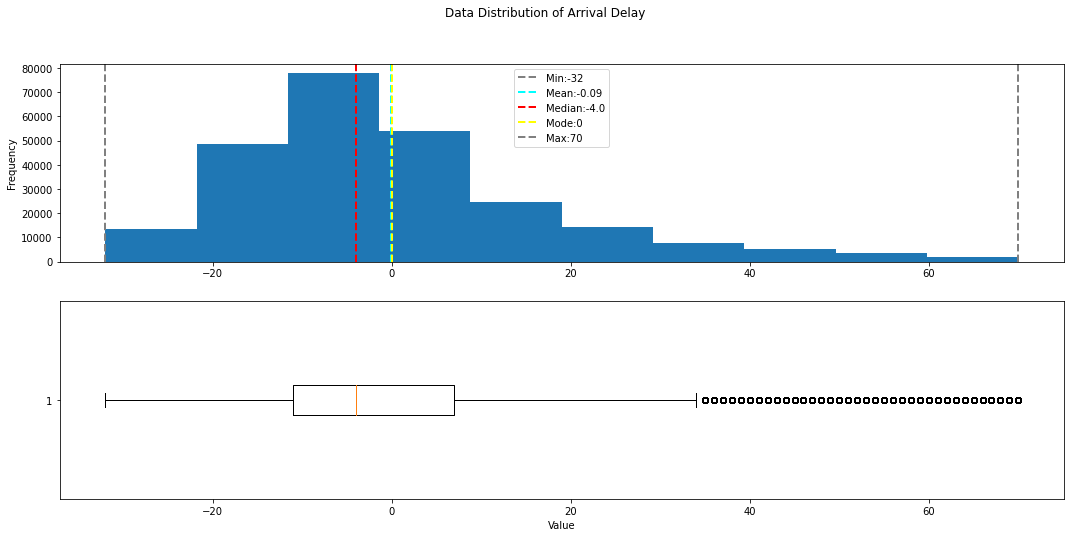

In [90]:
show_distribution(df_cleaned.ArrDelay, 'Arrival Delay',figsize=(18,8))

In [91]:
df_cleaned.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,250861.0,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000
mean,2013.0,6.998071,15.819155,3.902380,12747.322453,12736.027569,1311.783203,3.915599,0.154839,1492.507106,-0.086311,0.171808,0.011469
std,0.0,1.991290,8.816356,1.990234,1505.701718,1505.575497,469.974665,14.081157,0.361752,490.551486,17.333704,0.377214,0.106475
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,910.000000,-4.000000,0.000000,1112.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1306.000000,-1.000000,0.000000,1515.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1714.000000,6.000000,0.000000,1909.000000,7.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,69.000000,1.000000,2359.000000,70.000000,1.000000,1.000000


In [92]:
# Average departure Delays consider flights which actually departed later than
# the sceduled time
df_cleaned[df_cleaned['DepDelay'] >= 0]['DepDelay'].mean()

13.646275557560353

In [93]:
# Average arrival Delays consider flights which actually arrived later than
# the sceduled time
df_cleaned[df_cleaned['ArrDelay'] >= 0]['ArrDelay'].mean()

15.415892434647123

<AxesSubplot:ylabel='Carrier'>

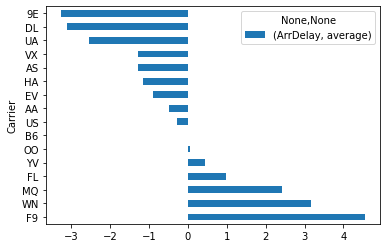

In [107]:
df_cleaned[['Carrier','ArrDelay']]\
                    .groupby(['Carrier'])\
                    .agg({'ArrDelay':[np.mean]})\
                    .rename(columns={'mean':'average'})\
                    .sort_values([('ArrDelay','average')],ascending=False)\
                    .plot(kind='barh')

In [96]:
# F9 airlines seems to have highest average delay of 4.55 minutes

<AxesSubplot:xlabel='DayOfWeek'>

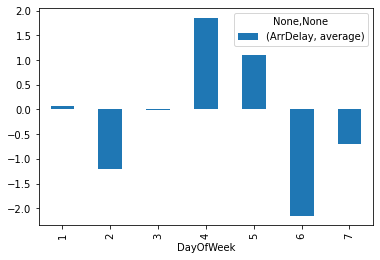

In [110]:
df_cleaned[['DayOfWeek','ArrDelay']]\
                    .groupby(['DayOfWeek'])\
                    .agg({'ArrDelay':[np.mean]})\
                    .rename(columns={'mean':'average'})\
                    .plot(kind='bar')

In [111]:
# The day of the week - from 1 (Monday) to 7 (Sunday)
# it seems that thursday and friday seem to have the most delays

In [118]:
df_cleaned[['OriginAirportName','DepDelay']]\
                    .groupby(['OriginAirportName'])\
                    .agg({'DepDelay':[np.mean]})\
                    .rename(columns={'mean':'average'})\
                    .sort_values([('DepDelay','average')],ascending=False)

,DepDelay
,average
OriginAirportName,
Chicago Midway International,9.961927
William P Hobby,8.155667
Dallas Love Field,7.670712
Denver International,6.910182
Dallas/Fort Worth International,6.759979
...,...
Honolulu International,0.292954
Tucson International,0.112871


In [119]:
# Chicago Midway International has the highest average departure delay

In [121]:
# Do late departures tend to result in longer arrival delays than on-time departures?
# first we need records which have depDelay>0 and find average ArrDelay
# then we need records which have depDelay=0 and find average ArrDelay

In [122]:
df_cleaned[(df_cleaned.DepDelay > 0)]['ArrDelay'].mean()

11.555430723298901

In [124]:
df_cleaned[(df_cleaned.DepDelay == 0)]['ArrDelay'].mean()

-3.187728459530026